In [1]:
pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

Processing ./mlrose
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose_hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=131724 sha256=a24ba289ce0567881bab3fd69697f912f8c9ef57b67cf348328b89a62cbd3fbb
  Stored in directory: /private/var/folders/c6/5zg6wy5n121f2pzclkwbzplm0000gn/T/pip-ephem-wheel-cache-ne6sp23b/wheels/77/c5/de/7a63a2c78a12ad335a5091a9209439e12d86616744464a5ae4
Successfully built mlrose_hiive
  Attempting uninstall: mlrose_hiive
    Found existing installation: mlrose_hiive 2.2.4
    Uninstalling mlrose_hiive-2.2.4:
      Successfully uninstalled mlrose_hiive-2.2.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
import mlrose_hiive as mh

In [3]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [4]:
import pandas as pd

In [5]:
class Task:
    def __init__(self, task_id, duration, deadline, profit):
        self.task_id = task_id
        self.duration = duration
        self.deadline = deadline
        self.profit = profit

In [6]:
# # Job Scheduling
problem_ffp = mh.JobSchedulingGenerator().generate(seed=0, size=3, tasks=[
    Task('A', 2, 5, 50),
    Task('B', 3, 8, 70),
    Task('C', 1, 4, 40),
], break_time=1, work_limit=2)
#state = problem_ffp.get_state()

In [7]:
problem_ffp.length

3

In [8]:
problem_ffp.fitness

110.0

In [9]:
# GAJ runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GAJSRunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[2, 4, 5],
              mutation_rates=[0.1, 0.08]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [10]:
df_run_curves_ffp.shape

(3663, 7)

In [11]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000466,140.0,0.0,2,0.1,2048
1,1,0.009528,140.0,1.0,2,0.1,2048
2,2,0.014147,140.0,2.0,2,0.1,2048
3,3,0.018413,140.0,3.0,2,0.1,2048
4,4,0.018879,140.0,4.0,2,0.1,2048


In [12]:
df_run_curves_ffp['Fitness'].max()

180.0

In [13]:
df_run_curves_ffp[df_run_curves_ffp.Fitness == df_run_curves_ffp['Fitness'].max()]

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
17,17,0.042219,180.0,18.0,2,0.10,2048
18,18,0.042844,180.0,19.0,2,0.10,2048
19,19,0.043441,180.0,20.0,2,0.10,2048
20,20,0.045784,180.0,21.0,2,0.10,2048
21,21,0.046246,180.0,22.0,2,0.10,2048
...,...,...,...,...,...,...,...
3658,498,0.568264,180.0,499.0,5,0.08,2048
3659,499,0.568856,180.0,500.0,5,0.08,2048
3660,500,0.569712,180.0,501.0,5,0.08,2048
3661,501,0.570429,180.0,502.0,5,0.08,2048


In [14]:
# need to check Time and FEvals

In [15]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [16]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
17,17,0.042219,180.0,18.0,2,0.10,2048
18,18,0.042844,180.0,19.0,2,0.10,2048
19,19,0.043441,180.0,20.0,2,0.10,2048
20,20,0.045784,180.0,21.0,2,0.10,2048
21,21,0.046246,180.0,22.0,2,0.10,2048
...,...,...,...,...,...,...,...
3658,498,0.568264,180.0,499.0,5,0.08,2048
3659,499,0.568856,180.0,500.0,5,0.08,2048
3660,500,0.569712,180.0,501.0,5,0.08,2048
3661,501,0.570429,180.0,502.0,5,0.08,2048


In [17]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,2,0.08,18.0,267.0,0.042219
1,2,0.10,18.0,267.0,0.042219
2,4,0.08,435.0,683.0,0.000338
3,4,0.10,189.0,436.0,0.000338
4,5,0.08,3.0,252.0,0.014147
5,5,0.10,3.0,252.0,0.014147


In [72]:
# tentatively, pick pop size = 5 and mutation_rate = 0.08, with the best iteration, FEvals and time

In [18]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000466,140.0,0.0,2,0.1,2048
1,1,0.009528,140.0,1.0,2,0.1,2048
2,2,0.014147,140.0,2.0,2,0.1,2048
3,3,0.018413,140.0,3.0,2,0.1,2048
4,4,0.018879,140.0,4.0,2,0.1,2048


In [19]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [20]:
# GA runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GAJSRunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[5], # 20 bits in total
              mutation_rates=[0.08])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [21]:
df_iter_curves_ffp.shape

(5099, 7)

In [22]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.002368,140.0,0.0,5,0.08,2048
1,1,0.015050,140.0,1.0,5,0.08,2048
2,2,0.020530,180.0,3.0,5,0.08,2048
3,3,0.030789,180.0,4.0,5,0.08,2048
4,4,0.031458,180.0,5.0,5,0.08,2048


In [23]:
df_iter_curves_ffp.Fitness.max()

180.0

In [1]:
#df_iter_curves_ffp.to_csv('gab_js_3.csv')
import pandas as pd
import numpy as np
df_iter_curves_ffp = pd.read_csv("../../csv-files/gab_js_3.csv")

In [25]:
df_iter_curves_ffp.Iteration.max()

525

In [2]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [27]:
df_fitness_iter_ffp.shape

(526, 3)

In [28]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,119.0,721.111111
1,1,154.0,182.222222
2,2,160.0,266.666667
3,3,160.0,266.666667
4,4,160.0,266.666667


In [30]:
# converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

25

In [3]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [32]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,119.0,721.111111,26.853512
1,1,154.0,182.222222,13.498971
2,2,160.0,266.666667,16.329932
3,3,160.0,266.666667,16.329932
4,4,160.0,266.666667,16.329932


Text(0, 0.5, 'Fitness')

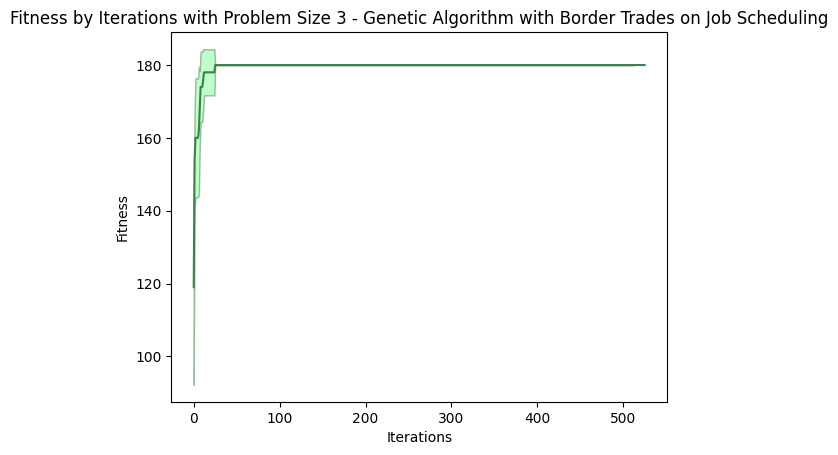

In [33]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#3F7F4C')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('Fitness by Iterations with Problem Size 3 - Genetic Algorithm with Border Trades on Job Scheduling')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [34]:
df_fitness_iter_ffp.stddev_fitness.max()

26.853512081497108

In [4]:
df_fitness_iter_ffp[df_fitness_iter_ffp['stddev_fitness'] > 10]

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,119.0,721.111111,26.853512
1,1,154.0,182.222222,13.498971
2,2,160.0,266.666667,16.329932
3,3,160.0,266.666667,16.329932
4,4,160.0,266.666667,16.329932
5,5,160.0,266.666667,16.329932
6,6,162.0,306.666667,17.511901
7,7,168.0,106.666667,10.327956


In [35]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()

17.511900715418264

In [46]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp.stddev_fitness.max()].Iteration,

(0    0
 Name: Iteration, dtype: int64,)

In [36]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()].Iteration

6    6
Name: Iteration, dtype: int64

In [37]:
df_fitness_iter_ffp[df_fitness_iter_ffp['stddev_fitness'].isna()].Iteration.min()

513

In [38]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration'] == 25].stddev_fitness

25    0.0
Name: stddev_fitness, dtype: float64

In [39]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration'] == 24].stddev_fitness

24    6.324555
Name: stddev_fitness, dtype: float64

In [123]:
# Fevals - iteration

In [6]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [41]:
df_FEvals_iter_ffp.shape

(526, 3)

In [42]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,1.7,0.233333
2,2,2.9,0.322222
3,3,3.9,0.322222
4,4,4.9,0.322222


In [43]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [44]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 0.6666666666666666)

In [7]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp['Iteration'] == 25]

,Iteration,avg_FEvals,var_FEvals
25,25,26.8,0.177778


In [45]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,1.7,0.233333,0.483046
2,2,2.9,0.322222,0.567646
3,3,3.9,0.322222,0.567646
4,4,4.9,0.322222,0.567646


Text(0, 0.5, 'FEvals')

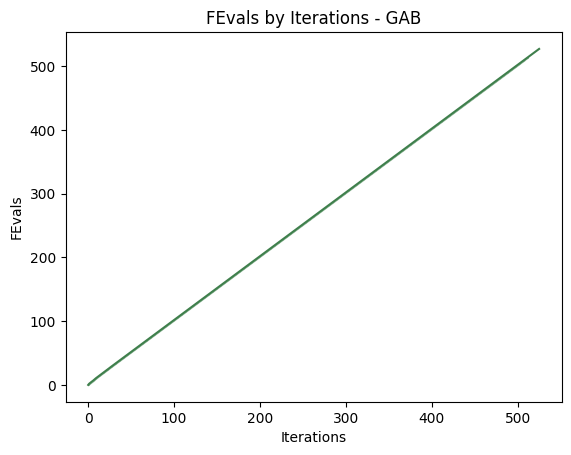

In [46]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#3F7F4C')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('FEvals by Iterations - GAB')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [47]:
# fitness - wall clock time

In [8]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [49]:
df_time_iter_ffp.shape

(526, 3)

In [9]:
df_time_iter_ffp[df_time_iter_ffp['Iteration'] == 25]

,Iteration,avg_time,var_time
25,25,0.03835,0.000216


In [50]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.000483,4.476300e-07
1,1,0.004598,1.428858e-05
2,2,0.010787,5.843173e-05
3,3,0.014595,8.626966e-05
4,4,0.015337,8.811034e-05


In [51]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [52]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.000483,4.476300e-07,0.000669
1,1,0.004598,1.428858e-05,0.003780
2,2,0.010787,5.843173e-05,0.007644
3,3,0.014595,8.626966e-05,0.009288
4,4,0.015337,8.811034e-05,0.009387


Text(0, 0.5, 'Time')

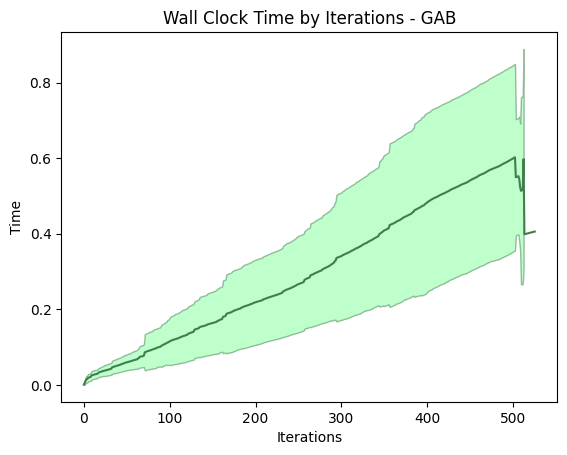

In [53]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#3F7F4C')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('Wall Clock Time by Iterations - GAB')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [54]:
df_time_iter_ffp.stddev_time.max()

0.29163260625310555

In [55]:
df_time_iter_ffp[df_time_iter_ffp['Iteration'] == 501]

,Iteration,avg_time,var_time,stddev_time
501,501,0.601167,0.061006,0.246994


In [56]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time == df_time_iter_ffp.stddev_time.max()].Iteration

512    512
Name: Iteration, dtype: int64

In [57]:
df_time_iter_ffp[df_time_iter_ffp['Iteration'] == 25]

,Iteration,avg_time,var_time,stddev_time
25,25,0.03835,0.000216,0.014706


In [ ]:
# maybe look at how std dev decrease in bulks

In [ ]:
# scatter plot of convergent points across problem sizes
plt.scatter([7, 14], [10, 333])
plt.title('Convergence Iteration Across Problem Sizes')
plt.xlabel('Problem Sizes')
plt.ylabel('Convergence Iteration')
plt.show()